## Linear Regression with Polynomial Features

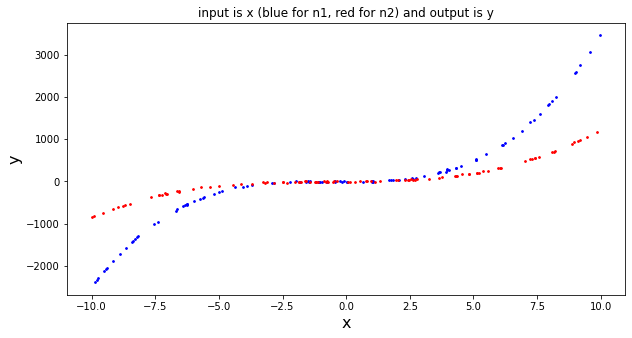

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import math


# creating the data set with n (n1 + n2), form third order polynomial 
# M=3

# creating n1 data
n1 = 100
n1Range = 10
n1X = np.random.uniform(-n1Range, n1Range, n1)

# plynomial parameters for n1
b0=2
b1=0
b2=5
b3=3
noiseLevel=9
noise=np.random.normal(-noiseLevel, noiseLevel, n1)
n1Y=b0+b1*n1X+b2*(n1X**2)+b3*(n1X**3)+noise

# creating n1 data
n2 = 100
n2Range = 10
n2X = np.random.uniform(-n2Range, n2Range, n2)

# plynomial parameters for n2
b0=3
b1=5
b2=2
b3=1
noiseLevel=9
noise=np.random.normal(-noiseLevel, noiseLevel, n2)
n2Y=b0+b1*n2X+b2*(n2X**2)+b3*(n2X**3)+noise
 
# merging these data (n1 and n2) into one data set
x=n1X+n2X
y=n1Y+n2Y

# using train-test-split to divide this data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# plotting generated data sets
plt.figure(figsize=(10, 5))
plt.scatter(n1X, n1Y, s = 3, color='blue')
plt.scatter(n2X, n2Y, s = 3, color='red')
plt.title('input is x (blue for n1, red for n2) and output is y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

best m : 15
minimum test error : 180811.4161159163
train error for best m : 405339.7931903244


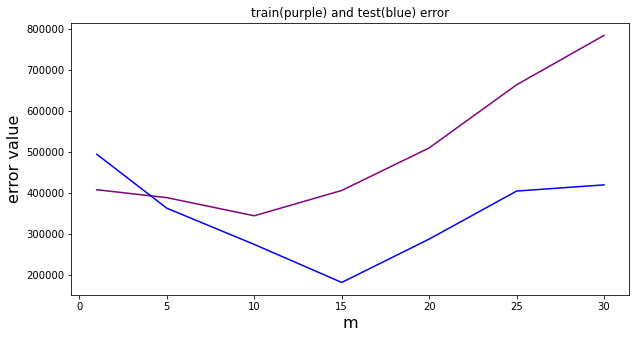

In [2]:
# for m=1 to 30, finding tarin and test error values 

x_train_input=x_train[:, np.newaxis]
x_test_input=x_test[:, np.newaxis]

# to find best m value, start values of the best m and minimum test error value
min_test_error=math.inf
train_error=0
best_m=0

train_errors, test_errors = [], []

# the array of m values
ran=[1, 5, 10, 15, 20, 25, 30]

for m in ran:
    
    # using polynomial features to map the data into higher dimension 
    polynomial_features=PolynomialFeatures(degree=m)
    x_poly_train=polynomial_features.fit_transform(x_train_input)
    x_poly_test=polynomial_features.fit_transform(x_test_input)

    # using linear regression on the data created by polynomial features 
    model=LinearRegression()
    model.fit(x_poly_train, y_train)
    y_train_pred = model.predict(x_poly_train)
    model.fit(x_poly_test, y_test)
    y_test_pred = model.predict(x_poly_test)

    # calculateing train and test error values
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    # choosing best m with lowest test error 
    if(mean_squared_error(y_test, y_test_pred)<=min_test_error):
        min_test_error=mean_squared_error(y_test, y_test_pred)
        train_error=mean_squared_error(y_train, y_train_pred)
        best_m=m


# printing best m value
print("best m :", best_m)
print("minimum test error :", min_test_error)
print("train error for best m :", train_error)

# plotting train and test error
plt.figure(figsize=(10, 5))
plt.plot(ran, train_errors, color='purple', label="train errors")
plt.plot(ran, test_errors, color='blue', label="test errors")
plt.title('train(purple) and test(blue) error')
plt.xlabel('m', fontsize=16)
plt.ylabel('error value', fontsize=16)
plt.show()

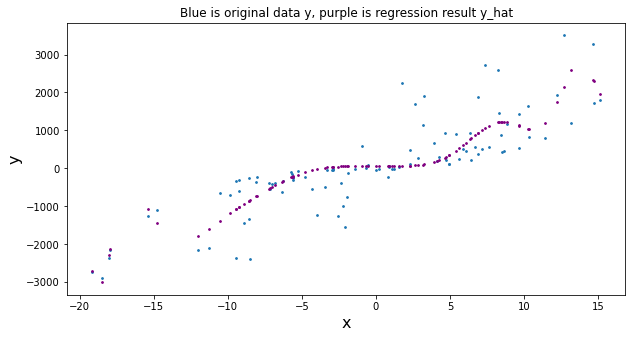

In [3]:
# for the best m, creating a pipline 

poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=best_m)),
    ("lin_reg", LinearRegression())
])

x_input = x[:,np.newaxis]
poly_regression.fit(x_input, y)
y_hat = poly_regression.predict(x_input)

# plotting generated data set and initial data set
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 3)
plt.scatter(x, y_hat, s = 3, color='purple')
plt.title('Blue is original data y, purple is regression result y_hat')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

Text(0.5, 1.0, 'train(red) and test(blue) error')

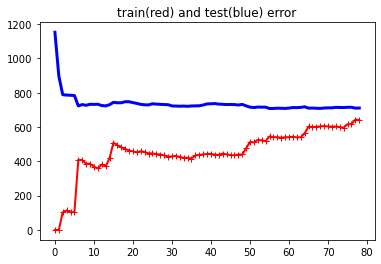

In [4]:
# creating learning curves

train_errors, test_errors = [], []

lin_reg = LinearRegression()

for m in range(1, len(x_train)):
    
    lin_reg.fit(x_train_input[:m], y_train[:m])
    y_train_predict = lin_reg.predict(x_train_input[:m])
    y_test_predict = lin_reg.predict(x_test_input)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
    
# plotting 
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
plt.title('train(red) and test(blue) error')